## Finding target pixel coordinates for all frames of Cine 

In this script, all frames from a Cine video will be loaded in all pixels inside the target contour will be found. This is done by extracting the target contour from each frame, and determining which pixels lie within this contour.


In [7]:
### Importing libraries

import numpy as np
import matplotlib

import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib.path as mpltPath

import matplotlib.patches as patches

import glob

import pickle

import skimage

from skimage.transform import downscale_local_mean

from skimage.util import img_as_float

import scipy

import scipy.spatial

from scipy.interpolate import interp1d

import os

import time


#### Reading in Cine Frames

In [3]:
#cine_video_name = 'TEST01_FRAC01-1-Plane-1-2021-11-10.ogv'

#cine_video_name = 'test02_cine_frac03.ogv'

cine_video_name = 'ZZZZZ, Modus4D  - Fraction1 - 1.ogv'

os.makedirs('Cine Pickles/' + cine_video_name  )


with open('Cine Pickles/' + cine_video_name + '/cine_res.pickle', 'rb') as handle:
    cine_res = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/cine_fps.pickle', 'rb') as handle:
    cine_fps = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/MR_res.pickle', 'rb') as handle:
    MR_res = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/MR_pixel.pickle', 'rb') as handle:
    MR_pixel = pickle.load(handle)


#minute_number = 1


cine_frame_list = list(glob.glob('Cine frames/' + cine_video_name + '/frame*.png'))




FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Cine Pickles/ZZZZZ, Modus4D  - Fraction1 - 1.ogv'

In [4]:
# cine_frames = [ plt.imread(cine_frame_file) for cine_frame_file in cine_frame_list[cine_fps*60*(minute_number - 1):cine_fps*60*(minute_number + 1)]]

# no_of_frames = len(cine_frames)

# print(no_of_frames)

In [31]:
number_of_minutes = int(np.ceil(len(cine_frame_list)/(8*60)))

print(number_of_minutes)


# with open('Cine Pickles/' + cine_video_name + '/number_of_minutes.pickle', 'rb') as handle:
#     number_of_minutes = pickle.load(handle)

with open('Cine Pickles/' + cine_video_name + '/number_of_minutes.pickle', 'wb') as handle:
    pickle.dump( number_of_minutes, handle, protocol=pickle.HIGHEST_PROTOCOL)


np.arange(1, np.ceil(len(cine_frame_list)/(8*60) ) +2 , 2 , dtype = 'int')

13


array([ 1,  3,  5,  7,  9, 11, 13])

#### Auto Below

In [2]:
with open('Cine Pickles/patient_numbers.pickle', 'rb') as handle:
    pat_nums = pickle.load(handle)
    
with open('Cine Pickles/pat_num_2_frac_nums.pickle', 'rb') as handle:
    pat_num_2_frac_nums = pickle.load(handle)
    
    

#### Define moving average function (to be used below)

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

#### Finding pixels in target contour for each frame


In [12]:
#changed red thres to 1.5x blue , 1.8x green and 0.4

# for pat_num in [2,3,4]:
    
#     for frac_num in [1,2,3,4,5]:
        
       
        




# cine_video_name = 'test0' + str(pat_num) + '_cine_frac0' + str(frac_num) + '.ogv'

# print(str(pat_num) + str(frac_num))




# for i in [2,3]:
    
    
#     print(i)


#     cine_video_name = 'ZZZZZ, Modus4D  - Fraction' + str(i) + ' - 1.ogv'




for pat_num in [1,6]:#pat_nums:

    for frac_num in range(1, pat_num_2_frac_nums[pat_num] + 1):

        print( '------>' + str(pat_num) + ' , ' + str(frac_num))



        cine_video_name = 'pat_' + str(pat_num) + '_frac_' + str(frac_num) + '.ogv'



    
# for number in [4]:
    
#     cine_video_name = 'phantom ' + str(number) + '.ogv'






        with open('Cine Pickles/' + cine_video_name + '/cine_res.pickle', 'rb') as handle:
            cine_res = pickle.load(handle)


        with open('Cine Pickles/' + cine_video_name + '/cine_fps.pickle', 'rb') as handle:
            cine_fps = pickle.load(handle)

        print(cine_fps)

        with open('Cine Pickles/' + cine_video_name + '/MR_res.pickle', 'rb') as handle:
            MR_res = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/MR_pixel.pickle', 'rb') as handle:
            MR_pixel = pickle.load(handle)


        #minute_number = 1



        with open('Cine Pickles/' + cine_video_name + '/number_of_frames.pickle', 'rb') as handle:
            number_of_frames = pickle.load(handle)


        cine_frame_list = [ 'Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_num for frame_num in range(0, number_of_frames) ]



        number_of_minutes = int(np.ceil(len(cine_frame_list)/(cine_fps*60)))

        #print(number_of_minutes)


        # with open('Cine Pickles/' + cine_video_name + '/number_of_minutes.pickle', 'rb') as handle:
        #     number_of_minutes = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/number_of_minutes.pickle', 'wb') as handle:
            pickle.dump( number_of_minutes, handle, protocol=pickle.HIGHEST_PROTOCOL)




        error_frames = []





























        time.sleep(30)


        for minute_number  in np.arange(1, number_of_minutes +2 , 2 , dtype = 'int'):


            print(minute_number)

            cine_frames = [ plt.imread(cine_frame_file) for cine_frame_file in cine_frame_list[cine_fps*60*(minute_number - 1):cine_fps*60*(minute_number + 1)]]

            Frames_Target_Pixel_Coordinates = []

            no_of_frames = len(cine_frames)

            print(no_of_frames)








            for i in range(0, no_of_frames):

                #print(i)



                frame_index = i

                cine_image = cine_frames[frame_index]




                ########### Change image dtype to float64

                cine_image = img_as_float(cine_image)

                cine_original = cine_image




                ############# Downscale image - makes contour in cine frame less blurry


                cine_downscaled = downscale_local_mean(cine_image, (2,2,1))

                cine_image = cine_downscaled



                ########### Search for red pixels of the target contour

            #     r_thres = 0.4

            #     g_lim = 0.3

            #     b_lim = 0.3



            #    red_pixels = np.where((cine_image[:,:,0] >= r_thres) & (cine_image[:,:,1] <= g_lim) & (cine_image[:,:,2] <= b_lim))



            ################# The optimum red thresholds/criteria seem to vary between videos - have to consider this on a video by video basis 
            #### Small blibs don't matter so much as these can be screened as outliers

                red_pixels = np.where((cine_image[:,:,0] >= 1.6*cine_image[:,:,1]) & (cine_image[:,:,0] >= 1.4*cine_image[:,:,2]) & (cine_image[:,:,0] >= 0.4))



                red_pixels_y = [ red_pixels[0][i] for i in range(0, len(red_pixels[0]))]

                red_pixels_x = [ red_pixels[1][i] for i in range(0, len(red_pixels[1]))]

                red_pixels_coords = [ [ red_pixels[1][i] , red_pixels[0][i]] for i in range(0, len(red_pixels[1]))]


                if len(red_pixels_coords) <= 10:

                    red_pixels_coords = [[0,i] for i in range(0,15) ]

                    error_frames.append( int( frame_index + cine_fps*120*(minute_number - 1)/2) )




                ############ Finding a sensible route through the set of red pixels

                coords = 0


                import scipy

                import scipy.spatial


                coords = red_pixels_coords

                #print(len(coords))


                original_point = coords[0]  ### Sets the starting point of the contour

                point = original_point

                #print(start_point)

                ordered_points = [] ### A list to be filled with sequential points in the contour

                ordered_points.append(point) #### adds first point


                for i in range(0 , len(coords) - 1 ):  # length - 1 since dealing with pairs of points


                    if i > 0.5*len(red_pixels_coords):

                        coords.append(original_point)  #if points have been missed, this basically stops them being counted at the end



                    coords_array = np.array(coords)

                    #print(coords_array.shape)

                    point_indx = np.where( (coords_array[:,0] == point[0]) & (coords_array[:,1] == point[1] ))  ### finds the index of the current point in the array of red pixel coordinates

                    point_indx = list(point_indx)[0][0]


                    kdt = scipy.spatial.KDTree(coords_array, leafsize=10, compact_nodes=True, copy_data=False, balanced_tree=True, boxsize=None)   #KDtree finds closest points to current point



                    closest_points = kdt.query(point, 2)  # finds the closest point to the current point



                    closest_point = coords[ closest_points[1][1]] ###sets the closest point


                    coords.pop(point_indx)  ##removes current point from array of red pixel coordinates

                    #print('s' + str(point))

                    #print(len(coords))


                    point = closest_point  #updates current point to closest point

                    ordered_points.append(point)  #adds point to ordered points list

                    #print('c' + str(point))



                ordered_points_array = np.array(ordered_points)









                ################# Take moving average of red pixel coordinates



                ordered_x = ordered_points_array[:,0]

                ordered_y = ordered_points_array[:,1]

                for i in range(0,1):

                    mov_avg_x = moving_average(ordered_x)

                    mov_avg_y = moving_average(ordered_y)


                mov_avg_points = [ [mov_avg_x[i], mov_avg_y[i]]  for i in range(0, len(mov_avg_x))]     

                mov_avg_points = mov_avg_points + [mov_avg_points[0]]


                mov_avg_array = np.array(mov_avg_points)


                #print(mov_avg_array)







                ################## Interpolate contour through pixel coordinates


                x_av, y_av = mov_avg_array.T



                i = np.arange(len(mov_avg_array[0::1]))


                interp_i = np.linspace(0, i.max(), 2 * i.max())

                xi = 2*interp1d(i, x_av, kind='cubic')(interp_i)
                yi = 2*interp1d(i, y_av, kind='cubic')(interp_i)

                # fig  = plt.figure(figsize = (10,10))

                # ax = fig.add_subplot()

                # ax.imshow(cine_original)
                # ax.plot(xi, yi, color = 'white', marker = '.')
                # #ax.plot(x_0, y_0, 'ko')
                # plt.show()








                ###################### Define Matplotlib path of contour


                interpolated_contour_points = [ [xi[j] , yi[j]] for j in range(0, len(xi)) ]

                path = mpltPath.Path(interpolated_contour_points)







                ######################## Define an array of pixels within the target, an append this array to the total list


                contour_mask1 = np.zeros(cine_original[:,:,0].shape)


                #############

                contour_mask2 = np.zeros(cine_original[:,:,0].shape)

                ########




                cont_x_min = int(np.floor(min(xi)))



                cont_x_max = int(np.ceil(max(xi)))

                cont_y_min = int(np.floor(min(yi)))

                cont_y_max = int(np.ceil(max(yi)))


                for x in range(cont_x_min - 1 , cont_x_max+1):

                    for y in range(cont_y_min - 1 , cont_y_max+1):

                        point = [[x,y]]

                        inside_point1 = path.contains_points(point, radius = 1)

                        inside_point2 = path.contains_points(point, radius = -1)

                        contour_mask1[y,x] = 1*inside_point1[0]

                        contour_mask2[y,x] = 1*inside_point2[0]


                if np.sum(contour_mask1) > np.sum(contour_mask2):

                    contour_mask = contour_mask1

                else: 

                    contour_mask = contour_mask2



                ##################################

                Target_pixels = np.where( contour_mask == 1)        


                Target_pixel_coordinates =  np.array([   [ Target_pixels[1][i]  ,  Target_pixels[0][i] ] for i in range(0 , len(Target_pixels[0]))  ] )


                Frames_Target_Pixel_Coordinates.append(Target_pixel_coordinates)



            #in case of no red contour in frame    


    #             if len(Frames_Target_Pixel_Coordinates) == 0:

    #                 Frames_Target_Pixel_Coordinates.append([0,0])



            os.makedirs('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number))

            with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) + '/Frames_Target_Pixel_Coordinates.pickle', 'wb') as handle:
                pickle.dump(Frames_Target_Pixel_Coordinates, handle, protocol=pickle.HIGHEST_PROTOCOL)

            with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) + '/no_of_frames.pickle', 'wb') as handle:
                pickle.dump(no_of_frames, handle, protocol=pickle.HIGHEST_PROTOCOL)


        with open('Cine Pickles/' + cine_video_name + '/error_frames.pickle', 'wb') as handle:
            pickle.dump(error_frames, handle, protocol=pickle.HIGHEST_PROTOCOL)

------>1 , 1
4
1
480
3
480
5
480
7
480
9
480
11
480
13
337
15
0
------>1 , 2
4
1
480
3
480
5
480
7
480
9
480
11
480
13
480
15
420
17
0
------>1 , 3
4
1
480
3
480
5
480
7
480
9
480
11
145
------>1 , 4
4
1
480
3
480
5
480
7
480
9
336
11
0
------>1 , 5
4
1
480
3
480
5
480
7
480
9
480
11
300
13
0
------>6 , 1
4
1
480
3
480
5
480
7
480
9
480
11
480
13
480
15
480
17
480
19
480
21
480
23
480
25
480
27
37
------>6 , 2
4
1
480
3
480
5
480
7
480
9
480
11
480
13
480
15
125
------>6 , 3
4
1
480
3
480
5
480
7
480
9
480
11
480
13
480
15
480
17
149
------>6 , 4
4
1
480
3
480
5
480
7
480
9
480
11
480
13
461
15
0


In [5]:
Frames_Target_Pixel_Coordinates

NameError: name 'Frames_Target_Pixel_Coordinates' is not defined

#### Save this list of arrays of pixel coordinates contained within the target as a pickle file

In [221]:
import os

os.makedirs('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number))

In [222]:
with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) + '/Frames_Target_Pixel_Coordinates.pickle', 'wb') as handle:
    pickle.dump(Frames_Target_Pixel_Coordinates, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [223]:
with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) + '/no_of_frames.pickle', 'wb') as handle:
    pickle.dump(no_of_frames, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
len(Frames_Target_Pixel_Coordinates)

410

In [225]:
len(Frames_Target_Pixel_Coordinates)

960

In [13]:
Frames_Target_Pixel_Coordinates[107]

array([[261, 248],
       [262, 248],
       [263, 248],
       ...,
       [265, 312],
       [263, 313],
       [264, 313]], dtype=int64)

In [46]:
test = np.zeros(cine_original[:,:,0].shape)



a = 16

for i in range(0, len(Frames_Target_Pixel_Coordinates[a])):
    
    test[ Frames_Target_Pixel_Coordinates[a][i, 1] ,  Frames_Target_Pixel_Coordinates[a][i, 0] ] = 1
    
cine_image = plt.imread( cine_frame_list[8*960 + a])    

In [47]:
#Target_pixel_coordiantes =  np.array([   [ Target_pixels[1][i]  ,  Target_pixels[0][i] ] for i in range(0 , len(Target_pixels[0]))  ] )       

<IPython.core.display.Javascript object>


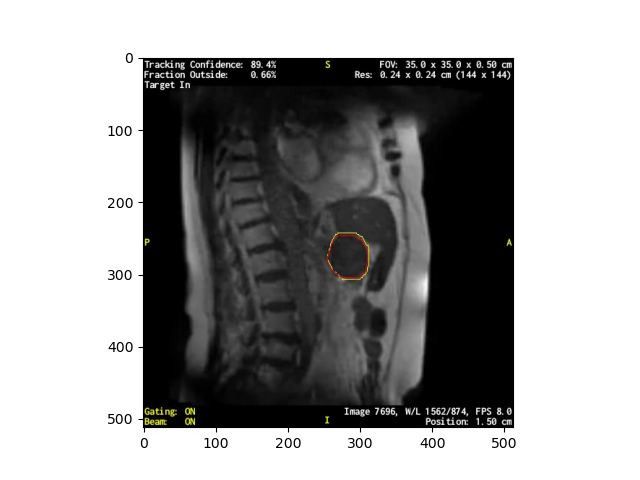

<IPython.core.display.Javascript object>


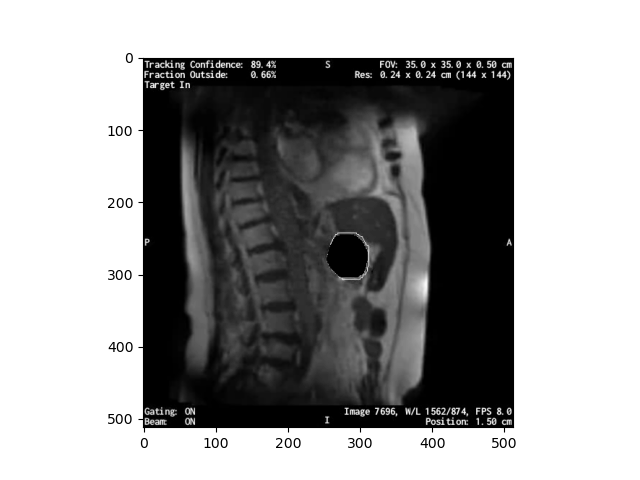

In [48]:
plt.figure()

plt.imshow(cine_image)

plt.figure()


plt.imshow(cine_image[:,:,0]*(1-test), cmap = 'gray')

In [24]:


with open('Cine Pickles/' + cine_video_name + '/number_of_frames.pickle', 'rb') as handle:
    number_of_frames = pickle.load(handle)


cine_frame_list = [ 'Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_num for frame_num in range(0, number_of_frames + 1) ]


print(cine_frame_list[980:1300])

['Cine frames/pat_2_frac_2.ogv/frame-0980.png', 'Cine frames/pat_2_frac_2.ogv/frame-0981.png', 'Cine frames/pat_2_frac_2.ogv/frame-0982.png', 'Cine frames/pat_2_frac_2.ogv/frame-0983.png', 'Cine frames/pat_2_frac_2.ogv/frame-0984.png', 'Cine frames/pat_2_frac_2.ogv/frame-0985.png', 'Cine frames/pat_2_frac_2.ogv/frame-0986.png', 'Cine frames/pat_2_frac_2.ogv/frame-0987.png', 'Cine frames/pat_2_frac_2.ogv/frame-0988.png', 'Cine frames/pat_2_frac_2.ogv/frame-0989.png', 'Cine frames/pat_2_frac_2.ogv/frame-0990.png', 'Cine frames/pat_2_frac_2.ogv/frame-0991.png', 'Cine frames/pat_2_frac_2.ogv/frame-0992.png', 'Cine frames/pat_2_frac_2.ogv/frame-0993.png', 'Cine frames/pat_2_frac_2.ogv/frame-0994.png', 'Cine frames/pat_2_frac_2.ogv/frame-0995.png', 'Cine frames/pat_2_frac_2.ogv/frame-0996.png', 'Cine frames/pat_2_frac_2.ogv/frame-0997.png', 'Cine frames/pat_2_frac_2.ogv/frame-0998.png', 'Cine frames/pat_2_frac_2.ogv/frame-0999.png', 'Cine frames/pat_2_frac_2.ogv/frame-1000.png', 'Cine frames

In [35]:
with open('Cine Pickles/' + cine_video_name + '/Analysising Breath-holds/breath_hold_frames_split.pickle', 'rb') as handle:
    breath_hold_frames_split = pickle.load(handle)
    
print(len(breath_hold_frames_split))


FileNotFoundError: [Errno 2] No such file or directory: 'Cine Pickles/pat_2_frac_4.ogv/Analysising Breath-holds/breath_hold_frames_split.pickle'

In [70]:
Frames_Target_Pixel_Coordinates = []


for minute_number in np.arange(1,13,2):
    
    with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) + '/Frames_Target_Pixel_Coordinates.pickle', 'rb') as handle:
        this_min_Frames_Target_Pixel_Coordinates = pickle.load(handle)
        
    Frames_Target_Pixel_Coordinates += list(this_min_Frames_Target_Pixel_Coordinates)

In [71]:
# breath_hold = 14


heat_map0 = np.zeros((512, 512))


for breath_hold in range(0,20):


    for frame in breath_hold_frames_split[breath_hold]:

        #print(frame)

        array = np.zeros((512, 512))


        #frame = breath_hold_frames_split[breath_hold][0]

        for i in range(0, len(Frames_Target_Pixel_Coordinates[frame])):

            array[ Frames_Target_Pixel_Coordinates[frame][i, 1] ,  Frames_Target_Pixel_Coordinates[frame][i, 0] ] = 1


        heat_map0 += array



<IPython.core.display.Javascript object>


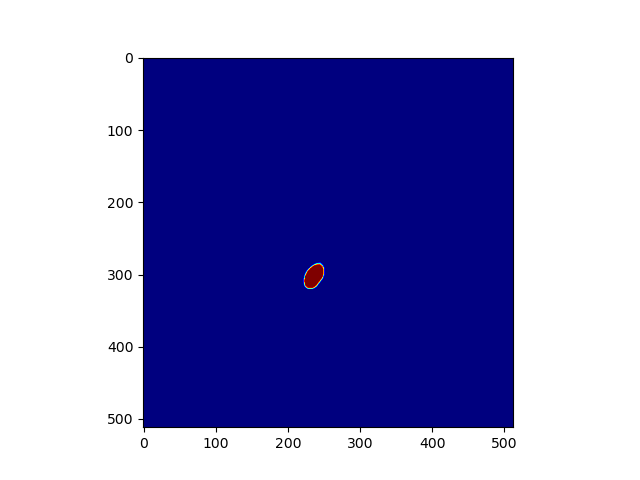

<IPython.core.display.Javascript object>


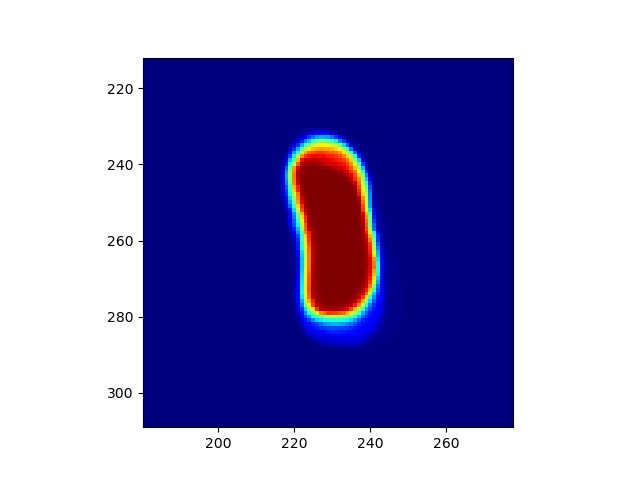

In [74]:
plt.figure()

plt.imshow(heat_map , cmap = 'jet')


plt.figure()

plt.imshow(heat_map0 , cmap = 'jet')